# Iris Dataset Exploratory Data Analysis (EDA)

### Author: Christopher Braun

Purpose: Exploratory Data Analysis of the Iris dataset using pandas and visualization tools

Date: September 2025

### **1. Imports**

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

### **2. Load Data**

In [10]:
# Load the Iris dataset into pandas DataFrame
iris_df: pd.DataFrame = sns.load_dataset('iris')

# List column names
print("Column names:")
print(iris_df.columns.tolist())
print("\n")

# Inspect first few rows of the DataFrame
print("First 5 rows:")
iris_df.head()

Column names:
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


First 5 rows:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### **3. Initial Data Inspection**

In [11]:
# Specify the number of rows to display
print("First 10 rows:")
iris_df.head(10)

# Inspect the shape of the DataFrame with shape attribute
print(f"DataFrame shape: {iris_df.shape}")
print(f"Number of rows: {iris_df.shape[0]}")
print(f"Number of columns: {iris_df.shape[1]}")

# Inspect the data types of the columns with dtypes attribute
print("Data types:")
print(iris_df.dtypes)

# Inspect the data types of the columns with info() method
iris_df.info()

First 10 rows:
DataFrame shape: (150, 5)
Number of rows: 150
Number of columns: 5
Data types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Initial Observations**

The Iris dataset contains 150 observations with 5 columns. Four columns are numerical (sepal_length, sepal_width, petal_length, petal_width) and one is categorical (species). There are no missing values in this dataset.

### **4. Initial Descriptive Statistics**

In [12]:
# Inspect summary statistics for numerical columns
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Observations**

The summary statistics show that petal measurements have greater variability than sepal measurements. Petal length ranges from 1.0 to 6.9 cm, while sepal length ranges from 4.3 to 7.9 cm.

### **5. Initial Data Distribution for Numerical Columns**

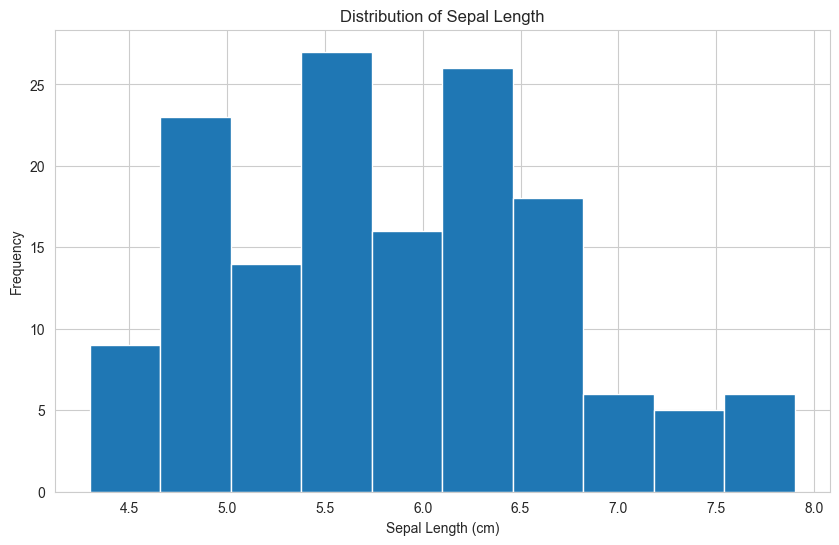

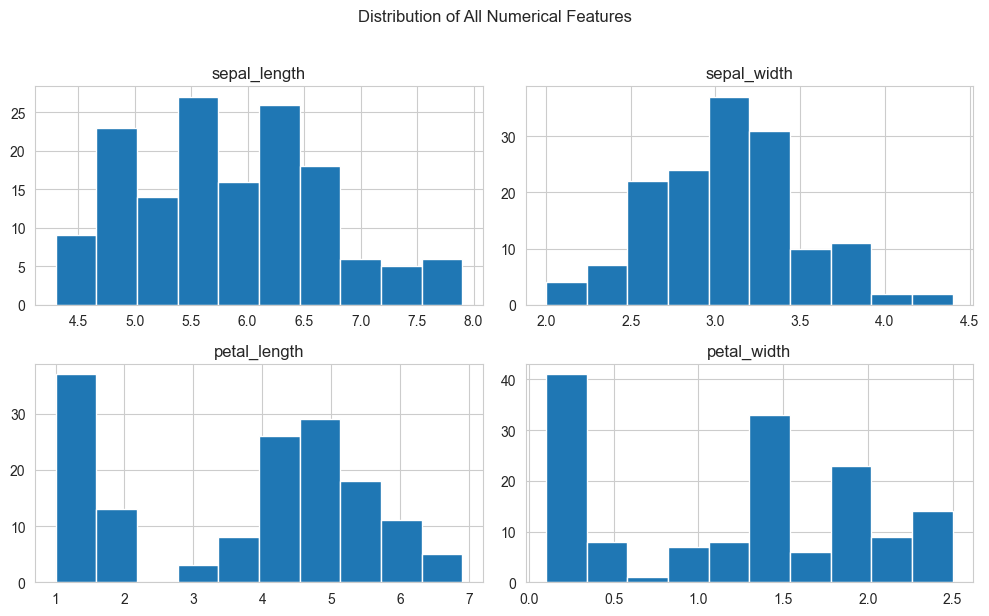

In [13]:
# Inspect histogram by one numerical column
iris_df['sepal_length'].hist()
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

# Inspect histograms for ALL numerical columns
iris_df.hist()
plt.suptitle('Distribution of All Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

**Observations**

The histograms show that sepal width appears roughly normally distributed, while petal length and width show bimodal distributions, suggesting possible clustering by species.

### **6. Initial Data Distribution for Catagorical Columns**

Species value counts:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64




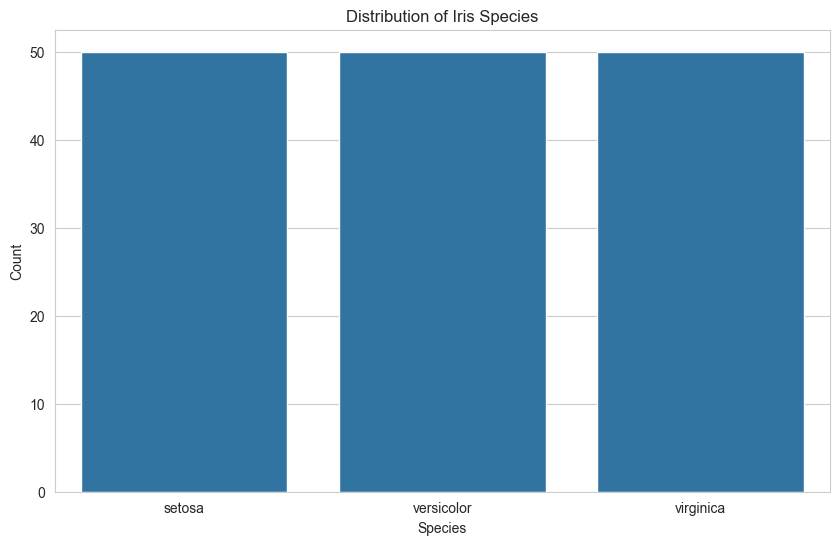

In [14]:
# Inspect value counts by categorical column
print("Species value counts:")
print(iris_df['species'].value_counts())
print("\n")

# Visualize distribution of species
sns.countplot(x='species', data=iris_df)
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

**Observations**

The dataset is perfectly balanced with 50 observations for each of the three iris species: setosa, versicolor, and virginica.

### **7. Initial Data Transformation and Feature Engineering**

In [15]:
# Create a copy to preserve original data
iris_analysis_df = iris_df.copy()

# Renaming columns for consistency and clarity
iris_analysis_df.rename(columns={
    'sepal_length': 'sepal_length_cm',
    'sepal_width': 'sepal_width_cm',
    'petal_length': 'petal_length_cm',
    'petal_width': 'petal_width_cm'
}, inplace=True)

# Adding new engineered features
iris_analysis_df['sepal_area_cm2'] = iris_analysis_df['sepal_length_cm'] * iris_analysis_df['sepal_width_cm']
iris_analysis_df['petal_area_cm2'] = iris_analysis_df['petal_length_cm'] * iris_analysis_df['petal_width_cm']
iris_analysis_df['sepal_to_petal_ratio'] = iris_analysis_df['sepal_length_cm'] / iris_analysis_df['petal_length_cm']

# Display the enhanced dataset
print("Enhanced dataset with new features:")
iris_analysis_df.head()

Enhanced dataset with new features:


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species,sepal_area_cm2,petal_area_cm2,sepal_to_petal_ratio
0,5.1,3.5,1.4,0.2,setosa,17.85,0.28,3.642857
1,4.9,3.0,1.4,0.2,setosa,14.70,0.28,3.500000
2,4.7,3.2,1.3,0.2,setosa,15.04,0.26,3.615385
3,4.6,3.1,1.5,0.2,setosa,14.26,0.30,3.066667
4,5.0,3.6,1.4,0.2,setosa,18.00,0.28,3.571429


**Observations**

The data is transformed into a csv style format.

### **8. Initial Visualizations**

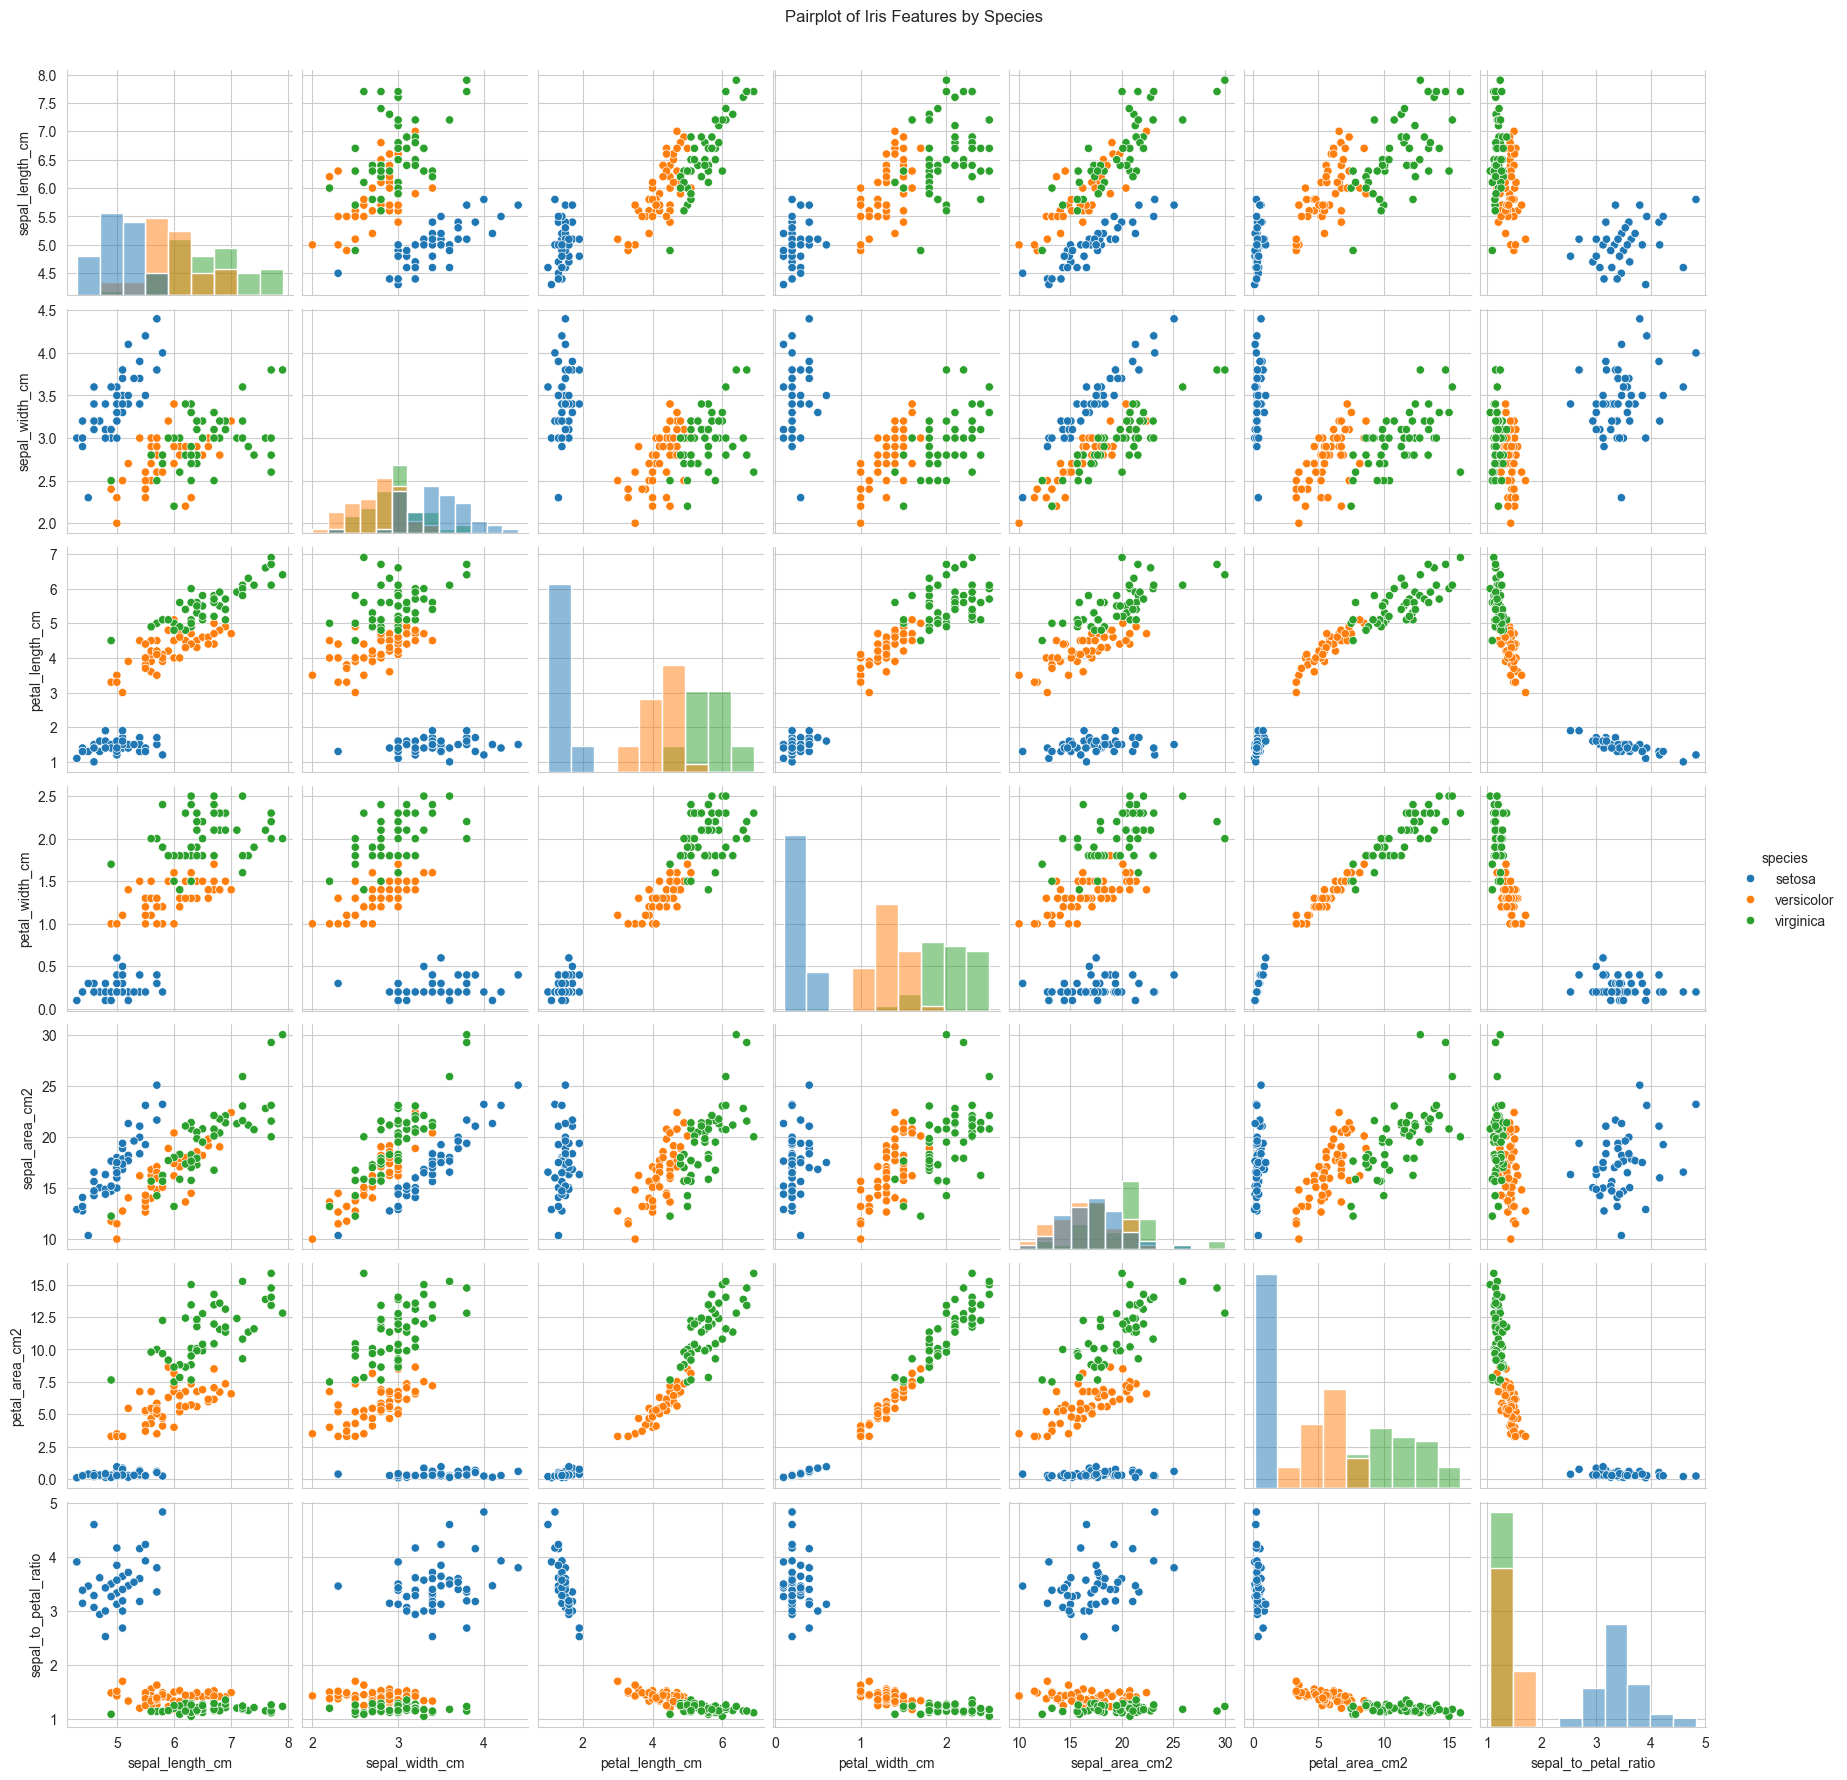

In [16]:
# Create a pairplot of the Iris dataset
sns.pairplot(iris_analysis_df, hue='species', diag_kind='hist')
plt.suptitle('Pairplot of Iris Features by Species', y=1.02)
plt.show()

**Observations**

The pairplot clearly shows that the three species form distinct clusters, especially in petal measurements. Setosa has distinctly smaller petals compared to the other two species.

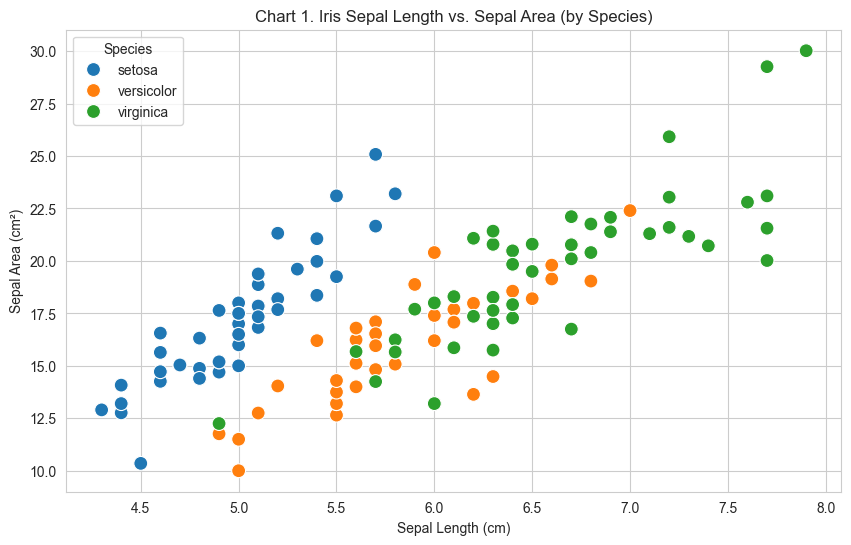

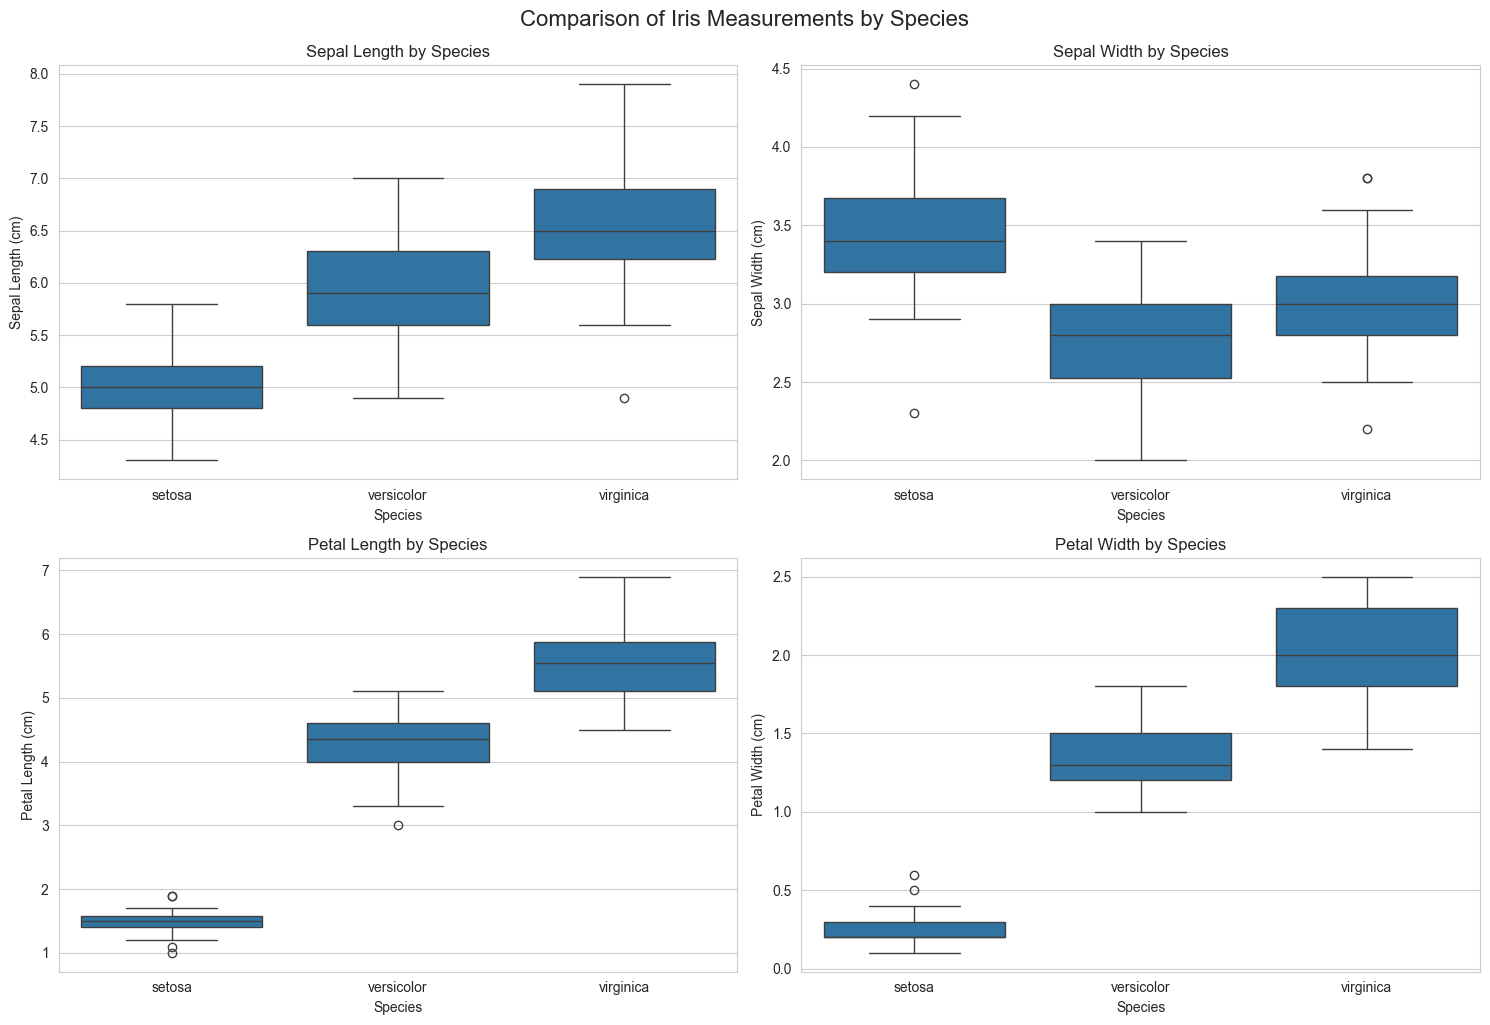

In [17]:
# Create a scatter plot comparing sepal length and area
scatter_plt = sns.scatterplot(
    data=iris_analysis_df, 
    x="sepal_length_cm", 
    y="sepal_area_cm2", 
    hue="species",
    s=100
)

# Customize the plot
scatter_plt.set_xlabel("Sepal Length (cm)")
scatter_plt.set_ylabel("Sepal Area (cm²)")   
scatter_plt.set_title("Chart 1. Iris Sepal Length vs. Sepal Area (by Species)")
plt.legend(title='Species')
plt.show()

# Create boxplots to compare distributions across species
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

features = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']
titles = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

for i, (ax, feature, title) in enumerate(zip(axes.flat, features, titles)):
    sns.boxplot(x='species', y=feature, data=iris_analysis_df, ax=ax)
    ax.set_title(f'{title} by Species')
    ax.set_xlabel('Species')
    ax.set_ylabel(f'{title} (cm)')

plt.tight_layout()
plt.suptitle('Comparison of Iris Measurements by Species', y=1.02, fontsize=16)
plt.show()

**Observations**

The boxplots clearly show distinct measurements for each species. Setosa has notably smaller petals but wider sepals compared to the other species. Virginica has the largest petals on average.

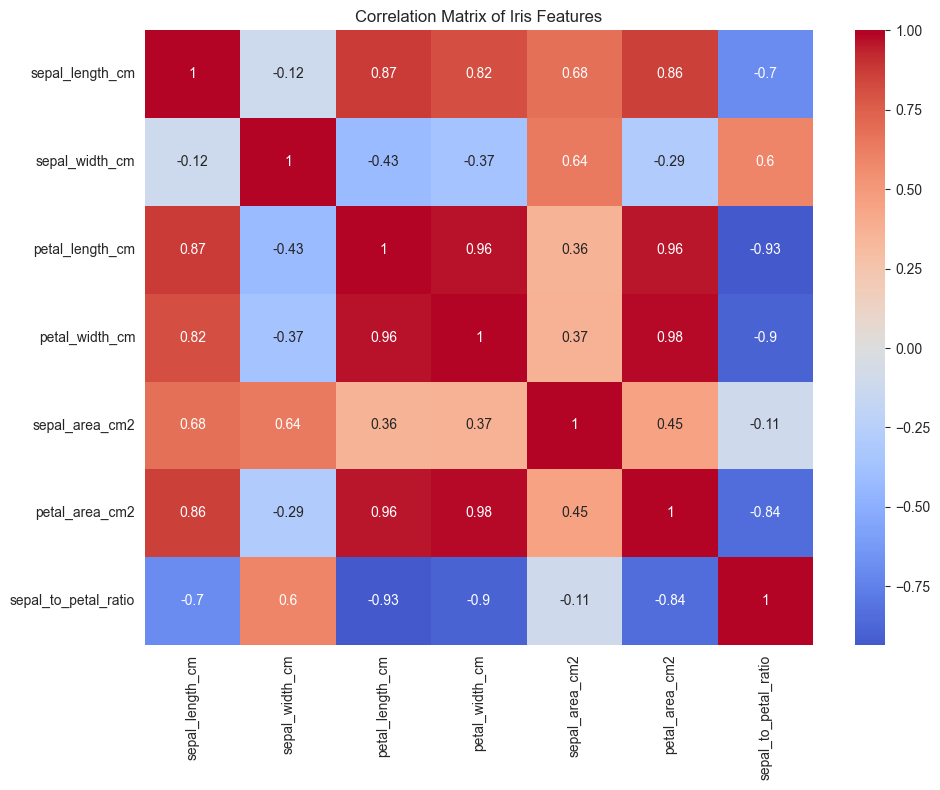

In [18]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_df = iris_analysis_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Iris Features')
plt.tight_layout()
plt.show()

**Observations**

The heatmap shows strong positive correlation between petal length and petal width (0.96), and between the new engineered features and their component measurements.

### **9. Inital Insights**

Based on the exploratory data analysis of the Iris dataset, several key insights emerge:

1. **Species Distinction:** The three iris species are clearly distinguishable based on their measurements, particularly petal dimensions.

2. **Measurement Patterns:**

   * Setosa has the smallest petals but the widest sepals
  
   * Virginica has the largest petals on average
  
   * Versicolor falls between the other two species in most measurements

3. **Strong Correlations:**

   * Petal length and width are highly correlated (0.96)

   * Sepal length is moderately correlated with petal measurements
  
   * Sepal width shows weak correlation with other measurements

4. **Feature Utility:** The newly created features (sepal area, petal area, and ratio) provide additional dimensions that could be useful for classification tasks.

5. **Data Quality:** The dataset is complete with no missing values and well-balanced across the three species classes.

*This analysis demonstrates that the Iris dataset is well-suited for classification modeling, with clear separability between classes and meaningful relationships between features.*